In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
import numpy
import math

K.set_image_dim_ordering('th')

seed = 88
numpy.random.seed(seed)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


8


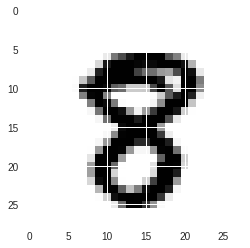

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

#selecting a random image from the dataset
image_index = 23456

# print the label
print(y_train[image_index])

#show the image
plt.imshow(x_train[image_index], cmap='Greys') 

In [3]:
#show the shape of the data set
x_train.shape

(60000, 28, 28)

In [4]:
from keras.utils import np_utils


# flatten 28*28 images to a 784 vector for each image
# reshaping the data so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')

# normalize inputs from 0-255 to 0-1
x_train /= 255
x_test /= 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 1, 28, 28)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import LearningRateScheduler

# Creating a Sequential Model and adding the layers
model = Sequential()

# 2D convolution layer with 28 nodes at the 1st layer, kernel size of 5,5 = 5x5 filter matrix
model.add(Conv2D(56, (5, 5), input_shape=(1, 28, 28), activation='relu'))

# pooling layer to reduce the spatial size of the representation to reduce the parameter counts which 
# reduces the computational complexity
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

#Dropout layers fight with the overfitting by disregarding some of the neurons
model.add(Dropout(0.2))
#Flatten layers flatten 2D arrays to 1D array for fully connected layers
model.add(Flatten()) 
model.add(Dense(256, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(192, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(BatchNormalization())

#final Dense layer must have 10 neurons
model.add(Dense(num_classes,activation=tf.nn.softmax))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 56, 24, 24)        1456      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 12, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 10, 10)        7575      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 5, 5)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 5, 5)          20        
_________________________________________________________________
dropout_1 (Dropout)  

In [0]:
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_acc'],label='validation')
    plt.plot(range(1,epochs+1),history.history['acc'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    #fig.savefig('img/'+str(i)+'-accuracy.jpg')
    #plt.close(fig)

# Step Decay
# Step decay schedule drops the learning rate by a factor every few epochs
# define step decay function

# As a digression, a callback is a set of functions to be applied at 
# given stages of the training procedure. We can use callbacks to get a 
# view on internal states and statistics of the model during training. 
# In our example, we create a custom callback by extending the base class keras.
# callbacks.Callback to record loss history and learning rate during the 
# training procedure.
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        print('lr:', step_decay(len(self.losses)))

# A typical way is to to drop the learning rate by half every 10 epochs. 
# To implement this in Keras, we can define a step decay function and use 
# LearningRateScheduler callback to take the step decay function as argument 
# and return the updated learning rates for use in SGD optimizer
def step_decay(epoch):
    initial_lrate = 0.004
    drop = 0.5
    epochs_drop = 4.0
    lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))
    return lrate

# learning schedule callback
loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
callbacks_list = [loss_history, lrate]

In [0]:
epochs = 80

In [8]:
# Adam is an optimization algorithm that can used instead of the classical stochastic gradient descent procedure 
# to update network weights iterative based in training data.
adam = keras.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(optimizer = adam, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model
hist = model.fit(x_train, y_train, batch_size=100, epochs=epochs,validation_data=(x_test, y_test), callbacks=callbacks_list,verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/80
 - 16s - loss: 0.2467 - acc: 0.9276 - val_loss: 0.0743 - val_acc: 0.9790
lr: 0.004
Epoch 2/80
 - 11s - loss: 0.1004 - acc: 0.9715 - val_loss: 0.0597 - val_acc: 0.9823
lr: 0.004
Epoch 3/80
 - 11s - loss: 0.0784 - acc: 0.9781 - val_loss: 0.0385 - val_acc: 0.9892
lr: 0.004
Epoch 4/80
 - 11s - loss: 0.0704 - acc: 0.9803 - val_loss: 0.0415 - val_acc: 0.9879
lr: 0.002
Epoch 5/80
 - 11s - loss: 0.0485 - acc: 0.9866 - val_loss: 0.0237 - val_acc: 0.9936
lr: 0.002
Epoch 6/80
 - 12s - loss: 0.0417 - acc: 0.9882 - val_loss: 0.0252 - val_acc: 0.9935
lr: 0.002
Epoch 7/80
 - 11s - loss: 0.0406 - acc: 0.9887 - val_loss: 0.0280 - val_acc: 0.9924
lr: 0.002
Epoch 8/80
 - 11s - loss: 0.0391 - acc: 0.9890 - val_loss: 0.0232 - val_acc: 0.9932
lr: 0.001
Epoch 9/80
 - 11s - loss: 0.0295 - acc: 0.9916 - val_loss: 0.0210 - val_acc: 0.9938
lr: 0.001
Epoch 10/80
 - 11s - loss: 0.0274 - acc: 0.9926 - val_lo

In [9]:
scores = model.evaluate(x_test, y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

10000/10000 [==============================] - 1s 110us/step
CNN Error: 0.42%


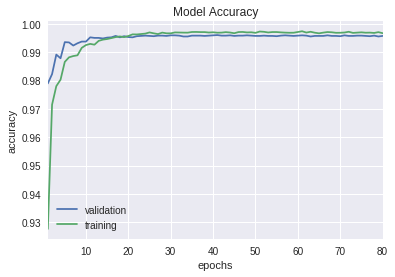

In [10]:
# plot model accuracy
plot_fig(1, hist)

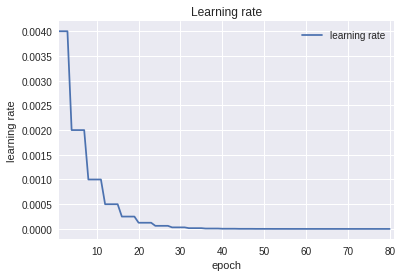

In [11]:
# plot learning rate
fig = plt.figure()
plt.plot(range(1,epochs+1),loss_history.lr,label='learning rate')
plt.xlabel("epoch")
plt.xlim([1,epochs+1])
plt.ylabel("learning rate")
plt.legend(loc=0)
plt.grid(True)
plt.title("Learning rate")
plt.show()


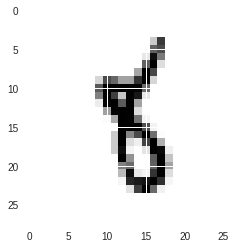

In [12]:
image_index = 5678
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')


In [13]:
pred = model.predict(x_test[5678].reshape(1, 1, 28, 28))
print(pred.argmax())

8


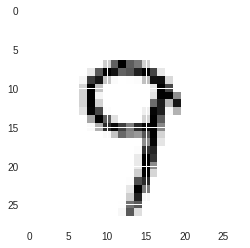

In [14]:
image_index = 2345
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')

In [15]:
pred = model.predict(x_test[image_index].reshape(1, 1, 28, 28))
print(pred.argmax())
print(image_index)

9
2345


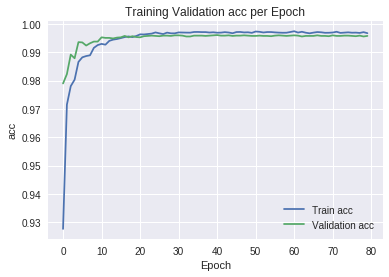

In [16]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

# Plot legend and use the best location automatically: loc = 0
plt.legend(["Train acc", "Validation acc"], loc = 'lower right')
plt.title("Training Validation acc per Epoch")
plt.xlabel("Epoch")
plt.ylabel("acc")
plt.show()

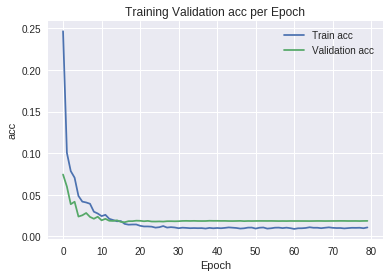

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

# Plot legend and use the best location automatically: loc = 0
plt.legend(["Train acc", "Validation acc"], loc = 'upper right')
plt.title("Training Validation acc per Epoch")
plt.xlabel("Epoch")
plt.ylabel("acc")
plt.show()